In [ ]:
#RUN THIS LINE OF CODE IF pd.read_sql_query DOES NOT WORK
#!pip install pandas==0.24.2

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [44]:
from sqlalchemy import create_engine
import getpass 
import psycopg2
import helper_functions as hp
from datetime import datetime
import matplotlib.pyplot as plt

In [45]:
db_string = "postgres://MONEYDB:{}@moneydb.cpbpjwbxydzi.us-east-2.rds.amazonaws.com:5432/postgres".format(getpass.getpass())

db = create_engine(db_string)

········


In [58]:
query = """

select * from public."Upward_Trends_Curr"
where "Day"= '2 Days Ago'
order by "MACD" desc

"""

In [59]:


fr = pd.read_sql_query(query,con=db)
fr

,index,Date,ticker,MACD,signal,Close,Upward,Day,DailyVariance,Daily_Volatility,Annualized_Volatility
0,34,2020-07-09,PFPT,0.924526,-0.380977,119.919998,1,2 Days Ago,0.000678,0.026035,0.411644
1,31,2020-07-09,OLED,0.767073,-0.146205,162.100006,1,2 Days Ago,0.000658,0.025652,0.405594
2,27,2020-07-09,HTHT,0.274751,0.170989,37.470001,1,2 Days Ago,0.001166,0.034142,0.539825
3,30,2020-07-09,MORN,0.253257,-0.179805,149.320007,1,2 Days Ago,0.000330,0.018171,0.287307
4,32,2020-07-09,OSUR,0.224064,-0.236757,13.536500,1,2 Days Ago,0.001967,0.044349,0.701224
5,33,2020-07-09,PCOM,0.154469,0.083547,10.595900,1,2 Days Ago,0.003092,0.055608,0.879238
6,35,2020-07-09,PRTA,0.142427,-0.068657,12.360000,1,2 Days Ago,0.001691,0.041119,0.650143
7,28,2020-07-09,KINS,0.096215,0.017999,5.300000,1,2 Days Ago,0.002762,0.052556,0.830987
8,36,2020-07-09,QGEN,0.052011,-0.016742,43.680000,1,2 Days Ago,0.000059,0.007691,0.121610
9,29,2020-07-09,LWAY,0.049137,0.004298,2.788000,1,2 Days Ago,0.001496,0.038683,0.611626


##### 26 Days vs 12 Day MA (When 12 day moves above the 26 day, this indicates an upward trend signal)

In [52]:
ticker = 'FCEL'

In [53]:



SDOW_q = """

select * from public."All_Prices_Full"
where ticker = '{}'

""".format(ticker)

In [54]:

SDOW = pd.read_sql_query(SDOW_q,con=db)



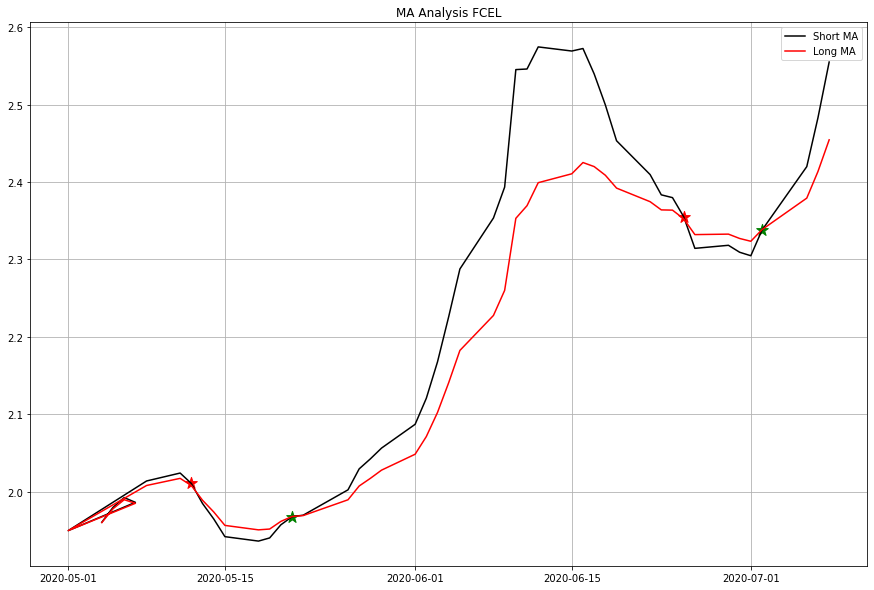

In [57]:




plt.figure(figsize=(15,10))
plt.plot(SDOW['Date'],SDOW['12Day_Moving_Average_Close'],label='Short MA',color='k')
plt.plot(SDOW['Date'],SDOW['26Day_Moving_Average_Close'],label='Long MA',color='r')


for values in range(len(SDOW)):
    if values!=0:
        if SDOW['MACD'].iloc[values]<0:
            if SDOW['MACD'].iloc[values-1]>0:
                plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='red',s=150)
                
    if SDOW['MACD'].iloc[values]>=0:
        if SDOW['MACD'].iloc[values-1]<0:
            plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='green',s=150)
            
            
plt.title('MA Analysis {}'.format(ticker))
plt.grid()
plt.legend()
plt.show()

##### When the blue line ocilates above the zero line, this indicates that the short term MA is above the long term MA....BUY signal.
##### When the blue line ocilates below the zero line, this indicates that the short term MA is below the long term MA....SELL signal.

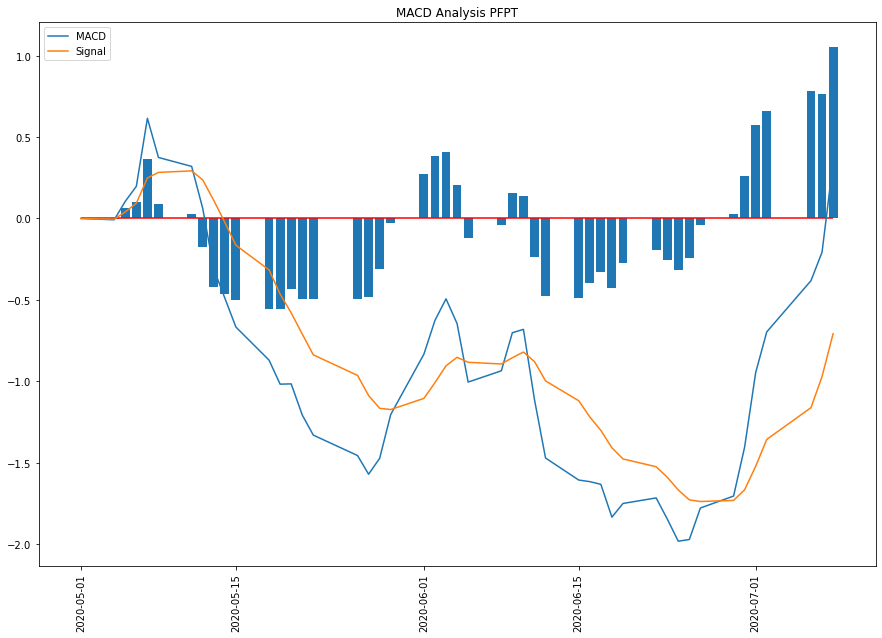

In [43]:
plt.figure(figsize=(15,10))
plt.title('MACD Analysis {}'.format(ticker))
plt.plot(SDOW['Date'],SDOW['MACD'],label='MACD')
plt.plot(SDOW['Date'],SDOW['signal'],label='Signal')
plt.hlines(0,SDOW['Date'].min(),SDOW['Date'].max(),'r')
plt.bar(SDOW['Date'],SDOW['hist'])
plt.legend()
plt.xticks(rotation=90)
plt.show()